### Chapter 6: Applying a R-CNN Model to Detect a Surfer and a Surfboard

In [1]:
# import modules
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as tt

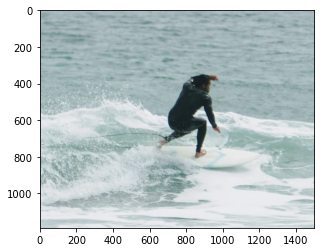

In [2]:
# show surfer image
img = Image.open('./media/surfer.jpg')
plt.imshow(img);

In [3]:
# load a pretrained R-CNN
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [4]:
# list of COCO classes
COCO_CLASSES = [
        '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
        'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
        'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
        'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
        'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
        'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
        'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
        'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
        'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]

In [5]:
# create a function that runs predictions and filters predictions using
# a 0.7 threshold
def filter_detections(img, model, threshold=0.7):
    with torch.no_grad():
        img_t = tt.ToTensor()(img)
        img_t = img_t.unsqueeze(0)
        if next(model.parameters()).is_cuda:
            img_t = img_t.pin_memory().cuda(non_blocking=True)
        pred = model(img_t)[0]
    boxes = pred['boxes']
    box_scores = pred['scores']
    labels = pred['labels']
    idxs = [i for (i, s) in enumerate(box_scores) if s > threshold]
    res = [(COCO_CLASSES[labels[i].cpu().tolist()], boxes[i].cpu().numpy()) for i in idxs]
    return res

In [6]:
# run the model
detections = filter_detections(img, model)

In [7]:
print(detections)

[('person', array([657.1097 , 348.05612, 989.6811 , 788.57245], dtype=float32)), ('surfboard', array([ 540.81366,  721.3714 , 1200.1666 ,  859.6029 ], dtype=float32))]


In [8]:
# create a function that adds bounding boxes on the image using
# the discovered detections
def show_detections(img, detections):
    colors = {'surfboard': 'lime', 'person': 'red'}
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype('arial', 16)
    for d in detections:
        name = d[0]
        box = d[1]
        color = 'red'
        print(box)
        if name in colors:
            color = colors[name]
        draw.rectangle(((box[0], box[1]), (box[2], box[3])), outline=color, width=8)
        draw.text((box[0], box[1] - 24), name, fill=color, font=font)
    return img

In [9]:
# add bounding boxes and names to image
img_detections = show_detections(img, detections)

[657.1097  348.05612 989.6811  788.57245]
[ 540.81366  721.3714  1200.1666   859.6029 ]


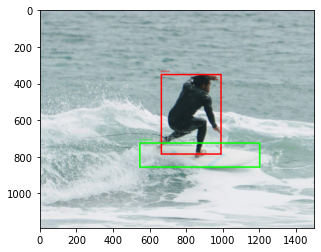

In [10]:
# show the detected items
plt.imshow(img_detections);